/tmp/ipykernel_6904/2668632008.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START, end=END, group_by="ticker")
[*********************100%***********************]  1 of 1 completed


✅ Saved cleaned Apple stock data to: /home/kunal/Desktop/QR/FinSight/data/stock_prices/apple_cleaned.csv

📈 Sample data:
        date        open        high         low       close   adj_close  \
0 2021-01-04  130.101348  130.189040  123.514430  126.096581  126.096581   
1 2021-01-05  125.589879  128.366914  125.141651  127.655594  127.655594   
2 2021-01-06  124.449847  127.694587  123.144152  123.358521  123.358521   
3 2021-01-07  125.073473  128.259752  124.586275  127.567924  127.567924   
4 2021-01-08  129.039267  129.234158  126.895598  128.669006  128.669006   

      volume  
0  143301900  
1   97664900  
2  155088000  
3  109578200  
4  105158200  


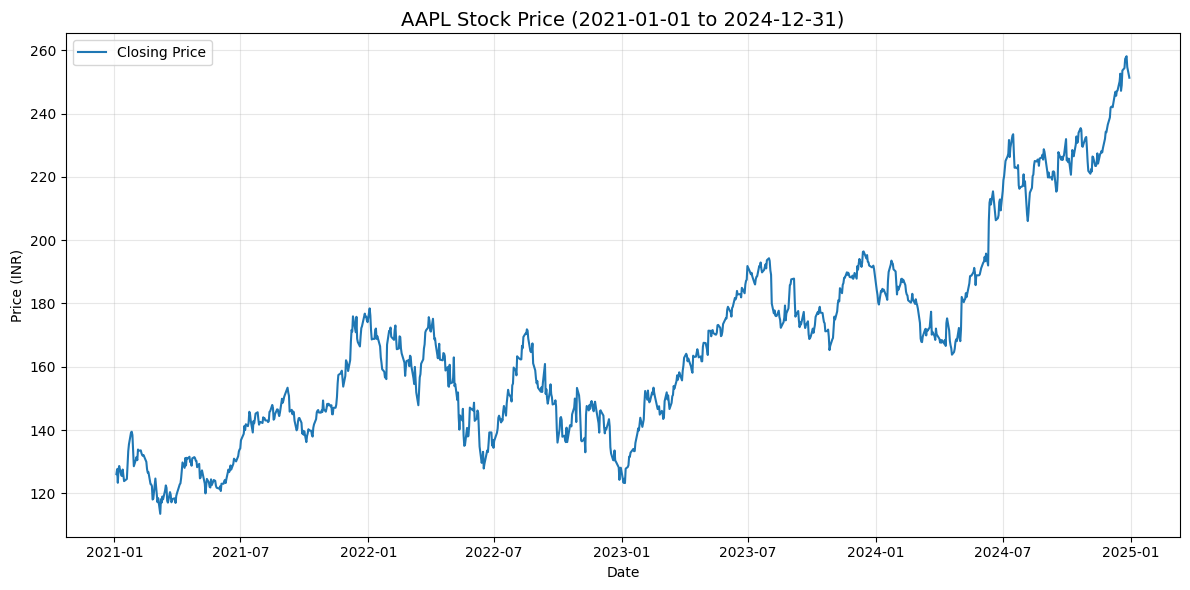

In [3]:
import pandas as pd
import yfinance as yf
import os
import matplotlib.pyplot as plt

# === CONFIG ===
TICKER = "AAPL"      # Apple Stocks
START = "2021-01-01"
END = "2024-12-31"
SAVE_PATH = "../../data/stock_prices/apple_cleaned.csv"

# === CREATE FOLDER IF NOT EXISTS ===
os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)

# === DOWNLOAD DATA ===
print(f"Downloading {TICKER} data from {START} to {END}...")
df = yf.download(TICKER, start=START, end=END, group_by="ticker")

# === HANDLE MULTIINDEX COLUMNS ===
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[1] if isinstance(col, tuple) else col for col in df.columns]

# === BASIC CLEANING ===
df.reset_index(inplace=True)
df.columns = [str(c).lower().replace(" ", "_") for c in df.columns]  # uniform naming

# Some tickers don't have 'adj_close' column
if "adj_close" not in df.columns:
    df["adj_close"] = df["close"]

# Handle missing values
df.dropna(inplace=True)

# Keep only necessary columns
columns_to_keep = [c for c in ["date", "open", "high", "low", "close", "adj_close", "volume"] if c in df.columns]
df = df[columns_to_keep]

# === SAVE CLEANED DATA ===
df.to_csv(SAVE_PATH, index=False)
print(f"\n✅ Saved cleaned Apple stock data to: {os.path.abspath(SAVE_PATH)}")

# === OPTIONAL: PREVIEW ===
print("\n📈 Sample data:")
print(df.head())

# === PLOT STOCK PRICES ===
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["close"], label="Closing Price", linewidth=1.5)
plt.title(f"{TICKER} Stock Price ({START} to {END})", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
